In [1]:
import subprocess
import os
import sys
sys.path.append('..//model_gen')
import setup_methods
import pandas as pd
import aggregate_reads

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import itertools

# Set up device for pytorch
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [2]:
# loop through each layer of the nl_list.
nl_list = [10, 20, 30, 4]
output_features = 2

for i in range(len(nl_list)-1):

    print(nl_list[i], nl_list[i+1])
print(nl_list[-1], output_features)

10 20
20 30
30 4
4 2


In [6]:

raw_params = "a, b, [c, d, e], f, g"
raw_list = raw_params.split(", ")
params_list = []
list_flag = False
for i in range(len(raw_list)):
    item = raw_list[i]
    if '[' in item:
        list_flag = True
        item.split

a
b
[c
d
e]
f
g


In [52]:
import itertools
import ast
comp = 20
weights = [.7, .3]
param_dict = {'device':[device],
              'n_features':[comp],
              'out_features':[2],
              'nl_list':[[comp^2, comp, int(comp/2)],
                         [int(((comp-1)^2 + (comp-1)) / 2), comp^2, comp*2, int(comp/2)],
                         [comp*2, comp*3, int(comp/2)],
                         [int(comp/2)],
                         [comp*2]],
              'activation_function':[nn.Tanh()],
              'loss_function':[nn.CrossEntropyLoss()],
              'epochs':[12],
              'learning_rate':[1, .5, .1, .05, .01],
              'random_state':[42]}

param_keys = list(param_dict.keys())
param_lists = []

for key in param_keys:
    value_list = param_dict[key]
    param_lists.append(value_list)
    
model_combos = list(itertools.product(*param_lists))
string = ""
for item in model_combos[0]:
    string = string + str(item) + "|"
string = string + str([.3, .5]) + "|"
with open("test_params.txt", 'w') as f:
    f.write(string)
    
    

    


device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
    
def activ_func_parser(act_str):
    '''
    parses an activity function string. Currently only works with nn.tanh()
    '''
    if act_str == 'Tanh()':
        return nn.Tanh()
    else:
        return nn.Tanh()

def loss_func_parser(loss_str, wt, device):
    '''
    parses a loss function string with weight and device. Currently only uses
    nn.CrossEntropyLoss()
    '''
    if len(wt) > 1:
        wt = torch.tensor(wt).type(torch.float).to(device)
        if loss_str == 'CrossEntropyLoss()':
            return nn.CrossEntropyLoss(weight = wt)
    else:
        return nn.CrossEntropyLoss()
    
    
param_string = None
with open("test_params.txt", 'r') as f:
    param_string = f.readline()

param_list = param_string.split("|")

# Check if the device is matching the current device and update accordingly.

if param_list[0] == device:
    device = param_list[0]
else:
    param_list[0] = device

param_list[9] = ast.literal_eval(param_list[9]) # weights notation

param_list[1] = int(param_list[1]) # PCA features
param_list[2] = int(param_list[2]) # Classes
param_list[3] = ast.literal_eval(param_list[3]) # Network list
param_list[4] = activ_func_parser(param_list[4]) # activation function
param_list[5] = loss_func_parser(param_list[5], param_list[9], device) # loss function
param_list[6] = int(param_list[6]) # epochs
param_list[7] = float(param_list[7]) # learning rate
param_list[8] = int(param_list[8]) # random state


param_list = param_list[:-1]

tuple(param_list)

('cuda',
 20,
 2,
 [22, 20, 10],
 Tanh(),
 CrossEntropyLoss(),
 12,
 1.0,
 42,
 [0.3, 0.5])

In [12]:
def percenttobar(frac):
    bar_str = "|"
    max_bars = 20
    perc = frac*2000
    n_bars = int(perc/100)
    for i in range(n_bars):
        bar_str += "="
    for i in range(max_bars-n_bars):
        bar_str += " "
    bar_str += "|  {}%                ".format(round(frac*100, 3))
    return bar_str
    

In [13]:
def find_pca_components(comp_list, data):
    '''
    find_pca_components takes in a list of number of components to be used,
    as well as feature data to be used for PCA, and returns the
    list of total explained variance as a percent for each number of components.
    
    Parameters:
    comp_list: List of ints representing number of components of interest
    data: pandas dataframe containing scaled unit variance feature data
    
    Returns:
    a list of explained variance as a percent for each number of components
    '''
    
    # Set up empty list
    explained = []
    # Loop through all components in the list
    for components in comp_list:
        # Set up PCA with the number of components of interest and the global random
        pca = PCA(n_components=components, random_state = GLOBAL_RANDOM_STATE)
        # Fit the data
        pca.fit(data)
        # Get the total explained variance ratio
        pcen_expl = (pca.explained_variance_ratio_).sum()
        # Add the value to the empty list
        explained.append(pcen_expl)
        
    # return the explained list
    return explained

In [36]:
def percenttobar(frac):
    bar_str = "|"
    max_bars = 20
    perc = frac*2000
    n_bars = int(perc/100)
    for i in range(n_bars):
        bar_str += "="
    for i in range(max_bars-n_bars):
        bar_str += " "
    bar_str += "|  {}%                ".format(round(frac*100, 3))
    return bar_str
    
def find_pca_components(comp_list, data):
    '''
    find_pca_components takes in a list of number of components to be used,
    as well as feature data to be used for PCA, and returns the
    list of total explained variance as a percent for each number of components.
    
    Parameters:
    comp_list: List of ints representing number of components of interest
    data: pandas dataframe containing scaled unit variance feature data
    
    Returns:
    a list of explained variance as a percent for each number of components
    '''
    
    # Set up empty list
    explained = []
    # Loop through all components in the list
    for components in comp_list:
        # Set up PCA with the number of components of interest and the global random
        pca = PCA(n_components=components, random_state = GLOBAL_RANDOM_STATE)
        # Fit the data
        pca.fit(data)
        # Get the total explained variance ratio
        pcen_expl = (pca.explained_variance_ratio_).sum()
        # Add the value to the empty list
        explained.append(pcen_expl)
        
    # return the explained list
    return explained

class PyTorchClassifier:
    '''
    Originally written by S. Peck and A. Mahmoud, Adapted for this project by S. Peck.
    
    PyTorchClassifier - Sebastian Peck, 12/1/2023
    PyTorchClassifier is an sklearn-styled class to aid in
    the classification of data using a pytorch neural network.
    Initialization requires the device to run pytorch on,
    number of input features, and number of classes.
    
    Updated 6/4/2024 - S. Peck
    
    '''
    def __init__(self,
                 device,
                 n_features:int,
                 out_features:int,
                 nl_list:list=[5, 5, 5],
                 activation_function=nn.ReLU(),
                 loss_function=nn.CrossEntropyLoss(),
                 n_epochs:int=1000,
                 learning_rate:float=.1,
                 random_state:int=42):
        '''
        initializing PyTorchClassifyer sets pytoch's random
        seed and generates the loss function, optimizer,
        and model of neural network based on passed parameters.
        
        Parameters:
        device: the device running pytorch
        n_features: number of features in data as int
        out_features: number of classes in the data as int
        nl_list: a list, with number of indexes as layers, 
                 and values representing neurons at that layer(as ints) Default = [5, 5, 5]
        activation_function: the torch.nn activation function of choice. Default = ReLU()
        loss_function: the torch.nn loss function of choice. Defualt = CrossEntropyLoss()
        n_epochs: int of number of epochs to perform when training. Default= 1000
        learning_rate: float representing learning rate. Defualt = .1
        random_state: the random state to use. Default = 42

        '''
        
        # Generate a string of the parameters
        self._param_string = (str(device) +', '+ str(n_features) +', '+ str(out_features) +', '+ str(nl_list) +', '+ str(activation_function) +', '+str(loss_function)+', '+ str(n_epochs) +', '+ str(learning_rate) +', '+ str(random_state))
        
        # assign the random seed to pytorch
        torch.manual_seed(random_state)
        
        # set the class variables
        self.epochs = n_epochs
        self.activation_function = activation_function
        self.loss_function = loss_function
        
        # Generate the model using the local ClassifierNetwork class
        self.model = (self.ClassifierNetwork(input_features=n_features,output_features=out_features,nl_list = nl_list, activation_function = self.activation_function)).to(device)
        
        # Optimize the model using SGD
        self.optimizer = torch.optim.SGD(params = self.model.parameters(), lr=learning_rate)
        

    
    def train_model(self, features, classes, epochs=None):
        if type(epochs) == type(None):epochs=self.epochs
        '''
        train_model takes in a torch formatted dataset of features,
        and the corresponding torch formatted dataset of classes,
        and trains the current model version on that data.
        
        Parameters:
        features: a pytorch tensor of floats representing the data for each feature
        classes: a pytorch tensor of LongTensors representing the classes for each point
        epochs: an int representing number of epochs to train this dataset. Default is the passed epochs when creating the model.
        
        Returns:
        The trained model.
        '''
        
        # repeat for every epoch
        for epoch in range(epochs):
            
            # Set up the model to train
            self.model.train()
            
            # Forward Pass - pass the features and
            # convert to class logits
            class_logits = self.model(features)

            # Convert the logits to probabilities to labels using softmax
            class_predictions = torch.softmax(class_logits, dim=1).argmax(dim=1)

            # Calculate loss
            # passing the logits and the training classes
            loss = self.loss_function(class_logits, classes)

            # Reset the optimizer gradient
            self.optimizer.zero_grad()

            # set backwards loss training
            loss.backward()

            # step the optimizer by one
            self.optimizer.step()
            
        # return the model
        return self.model
    
    
    def save_model_state(self, path, filename):
        '''
        save_model saves the model state to the given path.
        
        Parameters:
        path: path, as str, to the save location directory, must end with '/'
        filename: name of the file to be saved, as str
        
        Returns:
        path to saved file, as str
        '''
        
        save_path_str = '{}{}.pt'.format(path, filename)
        torch.save(self.model.state_dict(), save_path_str)
        
        return save_path_str
    
    
    def load_model_state(self, path):
        '''
        load_model_state loads the model state from a given path.
        
        Parameters:
        path: Path, as str, to the saved parameters file
        
        Returns:
        the loaded model, in evaluation state
        '''
        
        # load the model from the path
        self.model.load_state_dict(torch.load(path))

        # set the model into evaluation mode
        self.model.eval()
        
        # return the model
        return self.model
            
    
    def accuracy_score(self, y_true, y_pred):
        '''
        accuracy_score takes in two torch tensors of true and predicted values
        and returns the accuracy as a percentage fraction.
        
        Parameters:
        y_true: pytorch tensor of LongTensors representing classes of each point
        y_pred: pytorch tesnor of Longtensors representing predicted classses of each point
        
        Returns:
        the accuracy fraction
        '''
        
        # get number of the true predicted values to get the valid ones using torch.eq()
        valid = torch.eq(y_true, y_pred).sum().item()
        
        # Generate the precentage fraction
        acc = (valid/len(y_pred))
        
        # return the accuracy
        return acc
    
    
    def test_model(self, features, classes):
        '''
        test_model takes in a set of features and corresponding classes to
        test how the model performs with that dataset.
        
        Parameters:
        features: a pytorch tensor of floats representing the data for each feature
        classes: a pytorch tensor of LongTensors representing the classes for each point
        
        Returns:
        a touple containing the loss and the accuracy.
        
        '''
        
        # generate the logit values from the model by passing the test features
        test_logits = self.model(features)
        
        # generate the predictions using torch.softmax() and the test logits
        test_predictions = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        # Generate the loss using the class's loss function
        test_loss = self.loss_function(test_logits,
                                       classes)
        
        # Generate the accuracy score using the class accuracy score function
        test_acc = self.accuracy_score(classes,
                                       test_predictions)
        
        # Generate a string to hold the results for pretty-printing if needed
        #results = "Loss: {}, Accuracy Score: {}".format(test_loss, test_acc)
        #print(results)
        
        # return a touple of the loss value and the test accuracy.
        return (test_loss.item(), test_acc)
    
        
    class ClassifierNetwork(nn.Module):
        '''
        ClassifierNetwork is a subclass of the Pytorch nn.Module,
        which is meant to be used as a classifier.
        '''
        def __init__(self,
                     input_features:int,
                     output_features:int,
                     nl_list:list=[5, 5, 5],
                     activation_function=nn.ReLU()):
            '''
            Extends nn.Module.
            
            initializer sets up the model stack in sequential order according to the passed parameters.
            Uses linear layer stack of linear nn layers.
            
            Parameters:
            input_features: an int representing the number of features in the dataset
            output_features: an int representing the number of classes in the dataset
            nl_list: list representing number of neurons per layer,
                     with n indexes as the number of layers, Default = [5, 5, 5]
            activation_function: activation function of choice between layers. Default=nn.ReLU()
            
            Returns:
            N/A
            '''
            
            # Initialize the superclass
            super().__init__()
            
            # generate the starting neurons as the first index in the list
            starting_neurons = nl_list[0]
            #nl_list = nl_list[1:]
            print(nl_list)
            
            # set up a sequential stack
            self.linear_layer_stack = nn.Sequential()
            
            # add the first layer where the input features is the first number of neurons, and the output features are the starting neurons
            self.linear_layer_stack.append(nn.Linear(in_features = input_features, out_features = starting_neurons))
            
            
            # loop through each layer of the nl_list.
            for i in range(len(nl_list)-1):
                
                # append the activation function to the linear layer stack
                self.linear_layer_stack.append(activation_function)
                
                # check if the index is the last layer
                if (i == (len(nl_list)-2)):
                    
                    # if so, append the final layer with the number of target output features.
                    self.linear_layer_stack.append(nn.Linear(in_features=nl_list[i], out_features = output_features))
                else:
                    # otherwise, append a new layer where the input features is the current index in the nl_list, and the subsequent is the next.
                    self.linear_layer_stack.append(nn.Linear(in_features=nl_list[i], out_features = nl_list[i+1]))


        def forward(self, x):
            '''
            forward takes in a set of features and applies it to the linear layer stack.
            
            Paramters:
            x: set of features. 
            
            Returns:
            the linear layer stack with the passed features.
            '''
            return self.linear_layer_stack(x)
        
        
    def __str__(self):
        '''
        export self as string.
        '''
        return self._param_string

In [37]:
from IPython.lib.display import Audio
import numpy as np

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*800*t)*np.sin(2*np.pi*t) + np.sin(2*np.pi*400*t)
audio = Audio(audio_data, rate=framerate, autoplay=True)

bad_audio_data = np.sin(2*np.pi*800*t)+ np.sin(2*np.pi*700*t)
bad_audio = Audio(bad_audio_data, rate=framerate, autoplay=True)

def cmdnotify(status):
    if (status == 0):
        return audio
    else:
        return bad_audio

In [38]:
working_directory = '/media/sebastian/Slepnir/xenofind_datasets/Working_directory_PZ/'
ref_fasta = "/media/sebastian/Slepnir/xenofind_datasets/xref_libv2_PZ_CxDx.fa"
working_subdir=''
fasta_path = ''
IS_TRAINING = True
GLOBAL_RANDOM_STATE = 0

if IS_TRAINING:
    fasta_path = ref_fasta
    working_subdir = 'model_training/'
else:
    working_subdir = 'model_testing/'
    fasta_path = working_directory + working_subdir + 'consensus.fa'
    
bam_path = working_directory + working_subdir + 'basecall_directory/fwd_filtered.bam'
pod5_path = working_directory + working_subdir + 'merged_pod5/merged.pod5'
json_dir = working_directory + working_subdir + 'json_files/'
parquet_dir = working_directory + working_subdir + 'parquet_superdirectory/'
batch_size = 100

# convert the json files to constituent parquet files based on batch size


In [19]:
json_files = os.listdir(json_dir)
extracted_features = os.listdir(working_directory + working_subdir + "json_feature_files/")
feature_read_list = []
for i in range(len(extracted_features)):
    feature_read_list.append(pd.read_parquet(working_directory + working_subdir + "json_feature_files/" + extracted_features[i]))
    print(percenttobar(i/len(extracted_features)) + "{}/{}     ".format(i, len(extracted_features)),end='\r')

### ML Modeling Raw:

In [52]:
import random
random.seed(GLOBAL_RANDOM_STATE)
raw_df= pd.concat(feature_read_list[:1000])
n_bases = len(raw_df['XNA_PRESENT'])
n_xna = len(raw_df[raw_df['XNA_PRESENT'] == 1])

sub1 = raw_df[raw_df['XNA_PRESENT'] == 1]
sub0 = raw_df[raw_df['XNA_PRESENT'] == 0]#.sample(n=len(sub1), random_state=GLOBAL_RANDOM_STATE)
raw_df = pd.concat([sub1, sub0]).reset_index(drop=True)


# PARAMS FOR 7-mer:
# number of features
comp = 5
feature_num = comp
out_features = 2
epochs = 10
l_rate = .1
rs=42
nl_list = [comp**2, int((comp**2)/2), comp, int(comp/2)]


weights = torch.tensor([(1-((n_bases-n_xna)/(n_bases))), (1-(n_xna/(n_bases)))]).type(torch.float).to(device)

loss_fxn = nn.CrossEntropyLoss(weight=weights)
actv_fxn = nn.Tanh()

rPTmodel = PyTorchClassifier(device=device,
                            n_features = feature_num,
                            out_features = out_features,
                            nl_list = nl_list,
                            activation_function = actv_fxn,
                            loss_function = loss_fxn,
                            n_epochs=epochs,
                            learning_rate=l_rate,
                            random_state=rs)

print(int((len(raw_df))/100)-2)
for i in range(int(len(feature_read_list[:1000])/10)-3):
    i=i+1
    raw_df_set = pd.concat(feature_read_list[i*100:(i+1)*100])
    features = raw_df_set.loc[:, raw_df_set.columns != 'XNA_PRESENT']
    labels = raw_df_set['XNA_PRESENT']
    
    te_f = raw_df[0:100].loc[:, raw_df[0:100].columns != 'XNA_PRESENT']
    te_l = raw_df[0:100]['XNA_PRESENT']
    te_s = StandardScaler()
    pca = PCA(n_components = comp, random_state=GLOBAL_RANDOM_STATE)
    te_f=te_s.fit_transform(te_f)
    pca.fit(te_f)
    te_p=pca.transform(te_f)
    te_l.reset_index(drop=True)
    te_p=pd.DataFrame(te_p)

    scaler = StandardScaler()

    scaled_features = features.copy()
    scaled_features = pd.DataFrame(scaler.fit_transform(scaled_features))
    

    pca.fit(scaled_features)
    x_pca = pca.transform(scaled_features)
    evrs = pca.explained_variance_ratio_

    #print("Component Variance Ratio: ", evrs)
    #print("Total Explained Variance Ratio: ", evrs.sum())
    pca_df = pd.DataFrame(x_pca)
    labels.reset_index(drop=True)
    
    
    # Convert training data to tensors
    tr_x_tensor = torch.tensor(pca_df.values).type(torch.float).to(device)
    tr_y_tensor = torch.tensor(labels.values).type(torch.LongTensor).to(device)
    te_x_tensor = torch.tensor(te_p.values).type(torch.float).to(device)
    te_y_tensor = torch.tensor(te_l.values).type(torch.LongTensor).to(device)
    rPTmodel.train_model(tr_x_tensor, tr_y_tensor)
    train_loss, train_acc = rPTmodel.test_model(tr_x_tensor, tr_y_tensor)
    test_loss, test_acc = rPTmodel.test_model(te_x_tensor, te_y_tensor)
    print(i, end='\r')
    #print("Training: {}, Testing: {}".format(train_acc, test_acc))
    
    
    #print("Training: {}".format(train_acc))



for i in range(10):
    test_consensus = feature_read_list[i]
    scale = scaler.fit_transform(test_consensus.loc[:, test_consensus.columns != 'XNA_PRESENT'])
    feature_tensor = torch.tensor(pca.transform(scale)).type(torch.float).to(device)
    label_tensor = torch.tensor(test_consensus['XNA_PRESENT']).type(torch.float).to(device)
    test_logits = rPTmodel.model(feature_tensor)
    predicted_labels = torch.softmax(test_logits, dim=1).argmax(dim=1).tolist()
    pred_series = pd.Series(predicted_labels)
    label_list = label_tensor.tolist()
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(label_list, predicted_labels)
    fig, ax = plt.subplots(1, figsize=(2.5, 2))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")
    plt.show()
    print("Predicted Bases:  {}  ".format(pred_series[pred_series> 0].index.tolist()))
    print()
cmdnotify(0)

[25, 12, 5, 2]
1328


ValueError: No objects to concatenate

In [51]:
# Set up principal component analysis with 10 components, 

#7-mer 26
#5-mer 18
#3-mer 50-50 14
#fullset 12=96%
# 8=89%
comp = 21
pca = PCA(n_components = comp, random_state=GLOBAL_RANDOM_STATE)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)
evrs = pca.explained_variance_ratio_

print("Component Variance Ratio: ", evrs)
print("Total Explained Variance Ratio: ", evrs.sum())
pca_df = pd.DataFrame(x_pca)
labels.reset_index(drop=True)
x_tr, x_te, y_tr, y_te = train_test_split(pca_df,
                                          labels,
                                          test_size=.3,
                                          random_state = GLOBAL_RANDOM_STATE)

Component Variance Ratio:  [0.12694198 0.11730794 0.08936485 0.07265062 0.06966268 0.06384475
 0.05379282 0.05172365 0.04956583 0.04018986 0.03279792 0.02719532
 0.01879853 0.01647169 0.01430149 0.01260446 0.01180011 0.01134618
 0.01032612 0.00930922 0.0084944 ]
Total Explained Variance Ratio:  0.9084904413393055


In [52]:
# Set up device for pytorch
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


# Convert training data to tensors
tr_x_tensor = torch.tensor(x_tr.values).type(torch.float).to(device)
tr_y_tensor = torch.tensor(np.asarray(y_tr)).type(torch.LongTensor).to(device)

# Convert testing data to tensors
te_x_tensor = torch.tensor(x_te.values).type(torch.float).to(device)
te_y_tensor = torch.tensor(np.asarray(y_te)).type(torch.LongTensor).to(device)

# PARAMS FOR 7-mer:
# number of features
feature_num = tr_x_tensor.shape[1]
out_features = 2
epochs = 100
l_rate = .1
rs=42
nl_list = [comp**2, int((comp**2)/2), comp, int(comp/2)]


weights = torch.tensor([(1-((n_bases-n_xna)/(n_bases))), (1-(n_xna/(n_bases)))]).type(torch.float).to(device)

loss_fxn = nn.CrossEntropyLoss(weight=weights)
actv_fxn = nn.Tanh()

print(nl_list)

[441, 220, 21, 10]


In [13]:
rPTmodel = PyTorchClassifier(device=device,
                            n_features = feature_num,
                            out_features = out_features,
                            nl_list = nl_list,
                            activation_function = actv_fxn,
                            loss_function = loss_fxn,
                            n_epochs=epochs,
                            learning_rate=l_rate,
                            random_state=rs)

rPTmodel.train_model(tr_x_tensor, tr_y_tensor)
train_loss, train_acc = rPTmodel.test_model(tr_x_tensor, tr_y_tensor)
test_loss, test_acc = rPTmodel.test_model(te_x_tensor, te_y_tensor)

print("Training: {}, Testing: {}".format(train_acc, test_acc))
#Training: 0.9989926218986511, Testing: 0.9990260004997253


Training: 0.9916435480117798, Testing: 0.9921960234642029


In [14]:
res = pd.Series(torch.softmax(rPTmodel.model(tr_x_tensor), dim=1).argmax(dim=1).tolist())
len(res[res == 1])/len(res)

0.015778027746531684

In [18]:
torch.cuda.memory_summary(device=None, abbreviated=False)
torch.cuda.empty_cache()

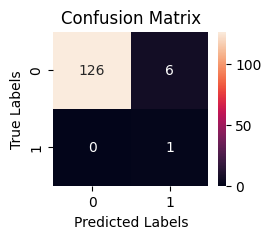

Predicted Bases:  [42, 43, 64, 65, 66, 68, 85]  



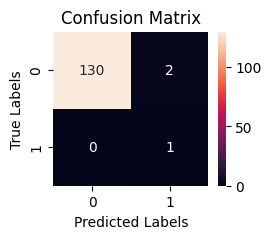

Predicted Bases:  [66, 84, 96]  



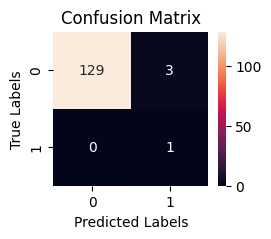

Predicted Bases:  [65, 66, 68, 84]  



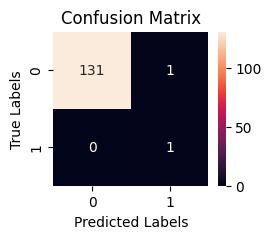

Predicted Bases:  [65, 66]  



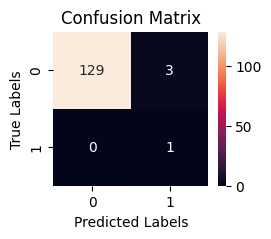

Predicted Bases:  [61, 65, 66, 84]  



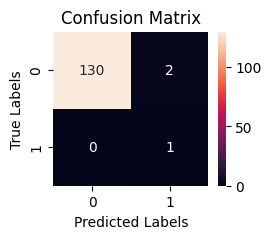

Predicted Bases:  [65, 66, 68]  



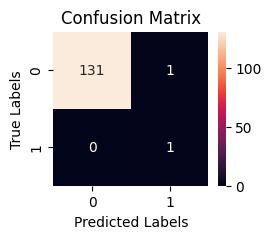

Predicted Bases:  [65, 66]  



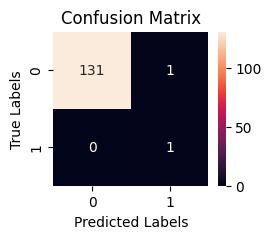

Predicted Bases:  [65, 66]  



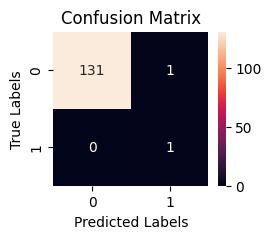

Predicted Bases:  [65, 66]  



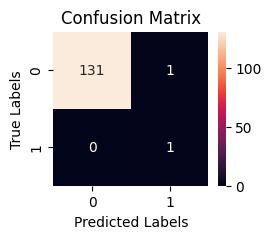

Predicted Bases:  [65, 66]  



In [16]:
for i in range(10):
    test_consensus = feature_read_list[i]
    scale = scaler.fit_transform(test_consensus.loc[:, test_consensus.columns != 'XNA_PRESENT'])
    feature_tensor = torch.tensor(pca.transform(scale)).type(torch.float).to(device)
    label_tensor = torch.tensor(test_consensus['XNA_PRESENT']).type(torch.float).to(device)
    test_logits = rPTmodel.model(feature_tensor)
    predicted_labels = torch.softmax(test_logits, dim=1).argmax(dim=1).tolist()
    pred_series = pd.Series(predicted_labels)
    label_list = label_tensor.tolist()
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(label_list, predicted_labels)
    fig, ax = plt.subplots(1, figsize=(2.5, 2))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")
    plt.show()
    print("Predicted Bases:  {}  ".format(pred_series[pred_series> 0].index.tolist()))
    print()
cmdnotify(0)

### ML Modeling Window

In [56]:
import random
random.seed(0)
window_size = 1
nmer_dim = window_size*2 + 1
windowed_params = []
for strand_features in feature_read_list[10:]:

    for i in range(int(len(strand_features)/nmer_dim)*2):
        random_base_pos = random.randrange(window_size, len(strand_features)-window_size-1, 1)
        upper = random_base_pos + window_size + 1
        lower = random_base_pos - window_size
        strand_features_subset = strand_features[lower:upper]
        #check if xna is present in the subset
        xna_present = len(strand_features_subset[strand_features_subset['XNA_PRESENT'] > 0].index.tolist())>0
        features_2d = strand_features_subset.loc[:, strand_features_subset.columns != 'XNA_PRESENT']
        features_long = [x for xs in features_2d.values for x in xs]
        #print(lower, upper)
        #print(len(features_long))
        #print()
        windowed_params.append({'XNA_PRESENT': int(xna_present), 'window_features':features_long})
window_df = pd.DataFrame(windowed_params)
window_df_features = pd.DataFrame.from_dict(dict(zip(window_df['window_features'].index, window_df['window_features'].values))).T
window_df_features['XNA_PRESENT'] = window_df['XNA_PRESENT']
window_df= window_df_features
xna_windows = window_df[window_df['XNA_PRESENT'] == 1]
rand_windows = window_df[window_df['XNA_PRESENT'] == 0]#.sample(n=len(xna_windows), random_state=0)
training_df = pd.concat([xna_windows, rand_windows]).reset_index(drop=True)

In [57]:

xna_windows = []
for strand_features in feature_read_list[10:]:

    xna_base_pos = strand_features[strand_features['XNA_PRESENT'] > 0].index[0]
    upper_bound = xna_base_pos + nmer_dim
    lower_bound = xna_base_pos - nmer_dim +1
    xna_windows.append(strand_features[lower_bound:upper_bound])

base_training_df = pd.concat(xna_windows).reset_index(drop=True)


In [58]:
GLOBAL_RANDOM_STATE = 0


features = training_df.loc[:, training_df.columns != 'XNA_PRESENT']
labels = training_df['XNA_PRESENT']

scaler = StandardScaler()

scaled_features = features.copy()
scaled_features = pd.DataFrame(scaler.fit_transform(scaled_features))

'''
component_list = list(np.arange(1,50, 1))
explained_variances = find_pca_components(component_list, scaled_features)

dy = np.diff(explained_variances)
dx = np.diff(component_list)

deriv = dy/dx
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(component_list, explained_variances)
ax[0].grid()
ax[0].set_title('Total Explained Variance Ratio vs n_components')
ax[0].set_xlabel('n_components')
ax[0].set_ylabel('Total Explained Variance Ratio')
ax[1].plot(component_list[1:], dy/dx)
ax[1].grid()
ax[1].set_title('Rate of change of EV vs n_components')
ax[1].set_xlabel('n_components')
ax[1].set_ylabel('Rate of Change of EV Ratio')
print()
'''

"\ncomponent_list = list(np.arange(1,50, 1))\nexplained_variances = find_pca_components(component_list, scaled_features)\n\ndy = np.diff(explained_variances)\ndx = np.diff(component_list)\n\nderiv = dy/dx\nfig, ax = plt.subplots(1,2, figsize = (10,5))\nax[0].plot(component_list, explained_variances)\nax[0].grid()\nax[0].set_title('Total Explained Variance Ratio vs n_components')\nax[0].set_xlabel('n_components')\nax[0].set_ylabel('Total Explained Variance Ratio')\nax[1].plot(component_list[1:], dy/dx)\nax[1].grid()\nax[1].set_title('Rate of change of EV vs n_components')\nax[1].set_xlabel('n_components')\nax[1].set_ylabel('Rate of Change of EV Ratio')\nprint()\n"

In [59]:
# Set up principal component analysis with 10 components, 

#7-mer 26
#5-mer 18
#3-mer 50-50 14
comp = 26
pca = PCA(n_components = comp, random_state=GLOBAL_RANDOM_STATE)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)
evrs = pca.explained_variance_ratio_

print("Component Variance Ratio: ", evrs)
print("Total Explained Variance Ratio: ", evrs.sum())

Component Variance Ratio:  [0.12694198 0.11730794 0.08936485 0.07265062 0.06966268 0.06384475
 0.05379282 0.05172365 0.04956583 0.04018986 0.03279792 0.02719532
 0.01879853 0.01647169 0.0143015  0.01260447 0.01180013 0.01134621
 0.01032614 0.00930925 0.0084954  0.00796791 0.00730855 0.00680389
 0.00656299 0.00570632]
Total Explained Variance Ratio:  0.9428412251906922


Text(0.5, 0, 'PC 3')

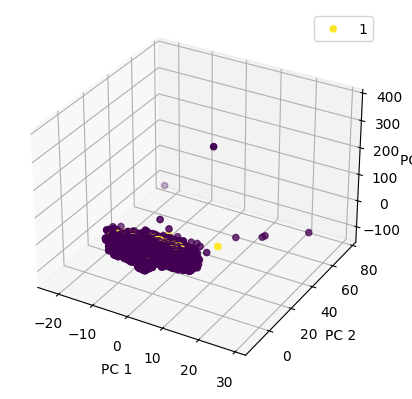

In [60]:
pca_df = pd.DataFrame(x_pca)
#outliers = pca_df[pca_df[1]>50].index
#pca_df = pca_df.drop(index=outliers)
#labels = labels.drop(index=outliers)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(90, 0, 0)
ax.scatter(pca_df[0], pca_df[1], pca_df[2], c=labels)
ax.legend(labels)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

In [61]:
labels.reset_index(drop=True)
x_tr, x_te, y_tr, y_te = train_test_split(pca_df,
                                          labels,
                                          test_size=.3,
                                          random_state = GLOBAL_RANDOM_STATE)

In [41]:
''' FULL FACTORIAL COMBINATION TO FIND PARAMS
pytorch_params = {'device':[device],
                  'n_features':[feature_num],
                  'out_features':[out_features],
                  'neurons':[5, 10, 50, 100, 200],
                  'layers':[1, 5, 10, 20, 50],
                  'activation_function':[nn.ReLU(), nn.LeakyReLU(), nn.Sigmoid(), nn.Tanh(), nn.Softmax()],
                  'loss_function':[nn.NLLLoss(),
                                   nn.CrossEntropyLoss()],
                  'n_epochs':[5, 10, 100, 1000],
                  'learning_rate':[.001, .01, 1],
                  'random_state':[rs]}

param_keys = list(pytorch_params.keys())
param_lists = []

for key in param_keys:
    value_list = pytorch_params[key]
    param_lists.append(value_list)
    
model_combos = list(itertools.product(*param_lists))

results_dict = {}

# Iteration index for keeping progress
i = 0

# Loop through each possible combination of parameters.
for params in model_combos:
    
    # Print percentage progress
    print(percenttobar(i/len(model_combos)), end='\r')
    
    # Generate the model from the current parameters
    test_model = PyTorchClassifier(*params)
    
    # Here, we generate the key of the model based on it's params
    key = params
    
    # Train the model
    test_model.train_model(tr_x_tensor, tr_y_tensor)
    
    # Test the model on training and testing data
    train_loss, train_acc = test_model.test_model(tr_x_tensor, tr_y_tensor)
    test_loss, test_acc = test_model.test_model(te_x_tensor, te_y_tensor)
    
    # Return the results to the dictionary
    results_dict[key] = [train_acc, test_acc]
    
    # Incriment the progress tracker
    i+=1
'''

" FULL FACTORIAL COMBINATION TO FIND PARAMS\npytorch_params = {'device':[device],\n                  'n_features':[feature_num],\n                  'out_features':[out_features],\n                  'neurons':[5, 10, 50, 100, 200],\n                  'layers':[1, 5, 10, 20, 50],\n                  'activation_function':[nn.ReLU(), nn.LeakyReLU(), nn.Sigmoid(), nn.Tanh(), nn.Softmax()],\n                  'loss_function':[nn.NLLLoss(),\n                                   nn.CrossEntropyLoss()],\n                  'n_epochs':[5, 10, 100, 1000],\n                  'learning_rate':[.001, .01, 1],\n                  'random_state':[rs]}\n\nparam_keys = list(pytorch_params.keys())\nparam_lists = []\n\nfor key in param_keys:\n    value_list = pytorch_params[key]\n    param_lists.append(value_list)\n    \nmodel_combos = list(itertools.product(*param_lists))\n\nresults_dict = {}\n\n# Iteration index for keeping progress\ni = 0\n\n# Loop through each possible combination of parameters.\nfor param

In [62]:
# Set up device for pytorch
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


# Convert training data to tensors
tr_x_tensor = torch.tensor(x_tr.values).type(torch.float).to(device)
tr_y_tensor = torch.tensor(np.asarray(y_tr)).type(torch.LongTensor).to(device)

# Convert testing data to tensors
te_x_tensor = torch.tensor(x_te.values).type(torch.float).to(device)
te_y_tensor = torch.tensor(np.asarray(y_te)).type(torch.LongTensor).to(device)

'''
# PARAMS FOR 7-mer:
# number of features
feature_num = tr_x_tensor.shape[1]
out_features = 2
epochs = 2000
l_rate = .01
rs=42
nl_list = [52, 2704, 55, 10]
loss_fxn = nn.CrossEntropyLoss()
actv_fxn = nn.Tanh()
'''
#PARAMS FOR 5-mer:
feature_num = tr_x_tensor.shape[1]
out_features = 2
epochs = 2000
l_rate = .01
rs=42
nl_list = [36, 1296, 10]
loss_fxn = nn.CrossEntropyLoss()
actv_fxn = nn.Tanh()


#PARAMS FOR 3-mer:
feature_num = tr_x_tensor.shape[1]
out_features = 2
epochs = 1000
l_rate = .1
rs=42
nl_list = [comp**2, comp, comp/2]
loss_fxn = nn.CrossEntropyLoss(weight=weights)
actv_fxn = nn.Tanh()





In [46]:
PTmodel = PyTorchClassifier(device=device,
                            n_features = feature_num,
                            out_features = out_features,
                            nl_list = nl_list,
                            activation_function = actv_fxn,
                            loss_function = loss_fxn,
                            n_epochs=epochs,
                            learning_rate=l_rate,
                            random_state=rs)

PTmodel.train_model(tr_x_tensor, tr_y_tensor)
train_loss, train_acc = PTmodel.test_model(tr_x_tensor, tr_y_tensor)
test_loss, test_acc = PTmodel.test_model(te_x_tensor, te_y_tensor)

print("Training: {}, Testing: {}".format(train_acc, test_acc))

Training: 0.9976311922073364, Testing: 0.9975493550300598


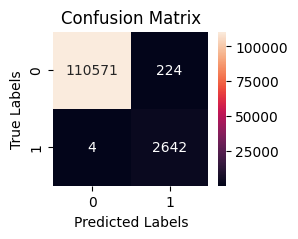

[(42, 45), (63, 66), (66, 69), (75, 78), (84, 87)]


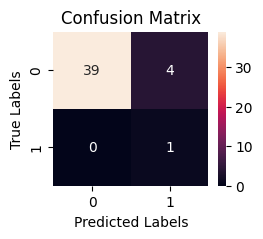

[(63, 66), (66, 69), (84, 87)]


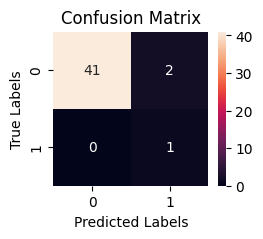

[(66, 69)]


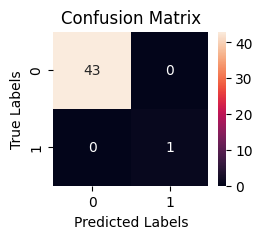

[(63, 66), (66, 69), (69, 72), (75, 78)]


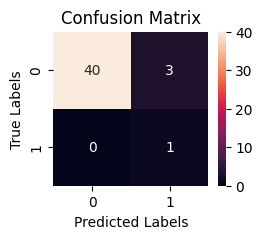

[(63, 66), (66, 69), (84, 87)]


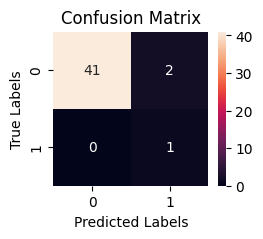

[(63, 66), (66, 69)]


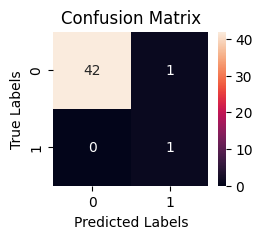

[(66, 69), (102, 105)]


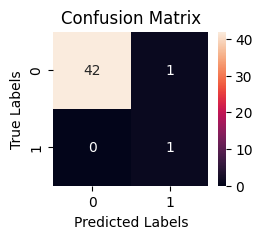

[(66, 69), (102, 105)]


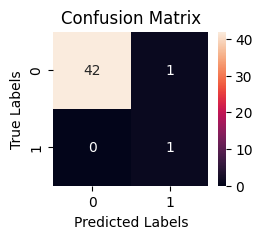

[(66, 69), (102, 105)]


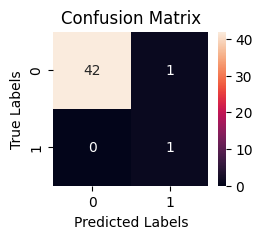

[(66, 69), (102, 105)]


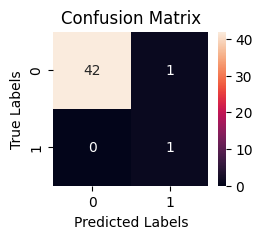

In [44]:

#print("Training misclassified/strand: {}, Testing misclassified/strand: {}".format(1-(132-train_acc.item()*132),1-(132-test_acc.item()*132)))
test_consensus = feature_read_list[0]
#PTmodel.model(torch.tensor(pca.transform(test_consensus.loc[:, test_consensus.columns != 'XNA_PRESENT'])).type(torch.float).to(device))[66]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(te_y_tensor.tolist(), torch.softmax(PTmodel.model(torch.tensor(x_te.values).type(torch.float).to(device)), dim=1).argmax(dim=1).tolist())
fig, ax = plt.subplots(1, figsize=(2.5, 2))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.show()



n_classified = []

for j in range(10):
    test_consensus = feature_read_list[j]
    # batch the bases into windows of size seven
    base_windows= [test_consensus[i:int(i+window_size*2+1)] for i in range(0, len(test_consensus), int(window_size*2+1))]
    # extract which windows have xna
    window_classes = []
    window_features = []
    
    for base_window in base_windows[:-1]:
        window_sub_features = []
        if len(base_window[base_window['XNA_PRESENT'] > 0]) > 0:
            window_classes.append(1)
        else:
            window_classes.append(0)
        for base in base_window.drop(columns=['XNA_PRESENT']).values:
            window_sub_features.extend(base)
        window_features.append(window_sub_features)
    
    
    
    scale = scaler.fit_transform(window_features)
    strand_features = torch.tensor(pca.transform(scale)).type(torch.float).to(device)
    strand_labels = torch.tensor(np.asarray(window_classes)).type(torch.LongTensor).to(device)
    strand_logits = PTmodel.model(strand_features)

    strand_predictions = torch.softmax(strand_logits, dim=1).argmax(dim=1)
    #print(strand_logits[66].tolist())
    predictions = strand_predictions.tolist()
    trues = strand_labels.tolist()
    pred_series=pd.Series(predictions)

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(trues, predictions)
    fig, ax = plt.subplots(1, figsize=(2.5, 2))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")
    print(list(zip(np.asarray(pred_series[pred_series> 0].index.tolist())*(window_size*2+1), (np.asarray(pred_series[pred_series> 0].index.tolist())+1)*(window_size*2+1))))
    plt.show()
    n_classified.append(len(pred_series[pred_series> 0].index.tolist()))

    

In [47]:
torch.cuda.memory_summary(device=None, abbreviated=False)
torch.cuda.empty_cache()

In [48]:
GLOBAL_RANDOM_STATE = 0


base_features = base_training_df.loc[:, base_training_df.columns != 'XNA_PRESENT']
base_labels = base_training_df['XNA_PRESENT']

base_scaler = StandardScaler()

base_scaled_features = base_features.copy()
base_scaled_features = pd.DataFrame(base_scaler.fit_transform(base_scaled_features))

'''
base_component_list = list(np.arange(1,50, 1))
base_explained_variances = find_pca_components(base_component_list, base_scaled_features)

dy = np.diff(base_explained_variances)
dx = np.diff(base_component_list)

deriv = dy/dx
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(base_component_list, base_explained_variances)
ax[0].grid()
ax[0].set_title('Total Explained Variance Ratio vs n_components')
ax[0].set_xlabel('n_components')
ax[0].set_ylabel('Total Explained Variance Ratio')
ax[1].plot(base_component_list[1:], dy/dx)
ax[1].grid()
ax[1].set_title('Rate of change of EV vs n_components')
ax[1].set_xlabel('n_components')
ax[1].set_ylabel('Rate of Change of EV Ratio')
print()
'''

"\nbase_component_list = list(np.arange(1,50, 1))\nbase_explained_variances = find_pca_components(base_component_list, base_scaled_features)\n\ndy = np.diff(base_explained_variances)\ndx = np.diff(base_component_list)\n\nderiv = dy/dx\nfig, ax = plt.subplots(1,2, figsize = (10,5))\nax[0].plot(base_component_list, base_explained_variances)\nax[0].grid()\nax[0].set_title('Total Explained Variance Ratio vs n_components')\nax[0].set_xlabel('n_components')\nax[0].set_ylabel('Total Explained Variance Ratio')\nax[1].plot(base_component_list[1:], dy/dx)\nax[1].grid()\nax[1].set_title('Rate of change of EV vs n_components')\nax[1].set_xlabel('n_components')\nax[1].set_ylabel('Rate of Change of EV Ratio')\nprint()\n"

Component Variance Ratio:  [0.35310236 0.16628024 0.14778779 0.13124174 0.06354141 0.04101998
 0.02122852 0.01766244 0.01435796 0.00810429 0.00754252 0.00688398
 0.00634069 0.00320098 0.00245108 0.00221126 0.00173267 0.00122126
 0.00096366 0.00065342]
Total Explained Variance Ratio:  0.9975282507743263


Text(0.5, 0, 'PC 3')

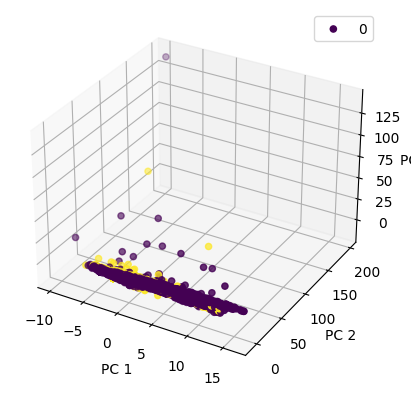

In [63]:
# Set up principal component analysis with 10 components, 

#7-mer 26
#5-mer 18
#3-mer 50-50 14
b_pca = PCA(n_components = 20, random_state=GLOBAL_RANDOM_STATE)
b_pca.fit(base_scaled_features)
b_x_pca = b_pca.transform(base_scaled_features)
b_evrs = b_pca.explained_variance_ratio_

base_labels.reset_index(drop=True)

print("Component Variance Ratio: ", b_evrs)
print("Total Explained Variance Ratio: ", b_evrs.sum())

b_pca_df = pd.DataFrame(b_x_pca)
#outliers = pca_df[pca_df[1]>50].index
#pca_df = pca_df.drop(index=outliers)
#labels = labels.drop(index=outliers)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(90, 0, 0)
ax.scatter(b_pca_df[0], b_pca_df[1], b_pca_df[2], c=base_labels)
ax.legend(base_labels)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

XNA Identifier Model Training: 0.975729763507843, Testing: 0.9761092066764832


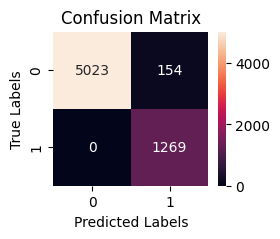

Sequence 1:
Identified Regions: [(42, 45), (63, 66), (66, 69), (84, 87)]
Identified Bases: [42, 43, 65, 66, 68, 86]

Sequence 2:
Identified Regions: [(63, 66), (66, 69), (69, 72), (84, 87)]
Identified Bases: [65, 66, 71]

Sequence 3:
Identified Regions: [(66, 69), (84, 87)]
Identified Bases: [66, 86]

Sequence 4:
Identified Regions: [(63, 66), (66, 69), (69, 72), (75, 78)]
Identified Bases: [65, 71, 76]

Sequence 5:
Identified Regions: [(63, 66), (66, 69), (84, 87)]
Identified Bases: [65, 66, 86]

Sequence 6:
Identified Regions: [(63, 66), (66, 69)]
Identified Bases: [65, 66]

Sequence 7:
Identified Regions: [(66, 69), (102, 105)]
Identified Bases: [66, 104]

Sequence 8:
Identified Regions: [(66, 69), (102, 105)]
Identified Bases: [66, 104]

Sequence 9:
Identified Regions: [(66, 69), (102, 105)]
Identified Bases: [66, 104]

Sequence 10:
Identified Regions: [(66, 69), (102, 105)]
Identified Bases: [66, 104]



In [66]:
base_labels.reset_index(drop=True)
b_x_tr, b_x_te, b_y_tr, b_y_te = train_test_split(b_pca_df,
                                          base_labels,
                                          test_size=.3,
                                          random_state = GLOBAL_RANDOM_STATE)

# Set up device for pytorch
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


# Convert training data to tensors
tr_x_tensor = torch.tensor(b_x_tr.values).type(torch.float).to(device)
tr_y_tensor = torch.tensor(np.asarray(b_y_tr)).type(torch.LongTensor).to(device)

# Convert testing data to tensors
te_x_tensor = torch.tensor(b_x_te.values).type(torch.float).to(device)
te_y_tensor = torch.tensor(np.asarray(b_y_te)).type(torch.LongTensor).to(device)

'''
# PARAMS FOR 7-mer UNWEIGHTED:
# number of features
feature_num = tr_x_tensor.shape[1]
out_features = 2
epochs = 4000
l_rate = .01
rs=42
nl_list = [225, 113, 50, 10, 5]

# optuna - hyperparameter optimization
n_xna = len(base_labels[base_labels >0])

weights = torch.tensor([(1-(n_xna/(len(base_labels)))), (1-((len(base_labels)-n_xna)/(len(base_labels))))]).type(torch.float).to(device)

loss_fxn = nn.CrossEntropyLoss(weight=weights)
actv_fxn = nn.Tanh()
'''
# number of features
feature_num = tr_x_tensor.shape[1]
out_features = 2
epochs = 2000
l_rate = .1
rs=42
nl_list = [400, 200, 20]

# optuna - hyperparameter optimization
#n_xna = len(base_labels[base_labels >0])

#weights = torch.tensor([(1-((len(base_labels)-n_xna)/(len(base_labels)))), (1-(n_xna/(len(base_labels))))]).type(torch.float).to(device)

loss_fxn = nn.CrossEntropyLoss(weight=weights)
actv_fxn = nn.Tanh()


bPTmodel = PyTorchClassifier(device=device,
                            n_features = feature_num,
                            out_features = out_features,
                            nl_list = nl_list,
                            activation_function = actv_fxn,
                            loss_function = loss_fxn,
                            n_epochs=epochs,
                            learning_rate=l_rate,
                            random_state=rs)

bPTmodel.train_model(tr_x_tensor, tr_y_tensor)
train_loss, train_acc = bPTmodel.test_model(tr_x_tensor, tr_y_tensor)
test_loss, test_acc = bPTmodel.test_model(te_x_tensor, te_y_tensor)

print("XNA Identifier Model Training: {}, Testing: {}".format(train_acc, test_acc))
#print("Training misclassified/strand: {}, Testing misclassified/strand: {}".format(1-(132-train_acc.item()*132),1-(132-test_acc.item()*132)))
test_consensus = feature_read_list[0]
#bPTmodel.model(torch.tensor(pca.transform(test_consensus.loc[:, test_consensus.columns != 'XNA_PRESENT'])).type(torch.float).to(device))[66]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(te_y_tensor.tolist(), torch.softmax(bPTmodel.model(torch.tensor(b_x_te.values).type(torch.float).to(device)), dim=1).argmax(dim=1).tolist())
fig, ax = plt.subplots(1, figsize=(2.5, 2))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
plt.show()



n_classified = []

for j in range(10):
    
    test_consensus = feature_read_list[j]
    # batch the bases into windows of size seven
    base_windows= [test_consensus[i:int(i+window_size*2+1)] for i in range(0, len(test_consensus), int(window_size*2+1))]
    # extract which windows have xna
    window_classes = []
    window_features = []
    
    for base_window in base_windows[:-1]:
        window_sub_features = []
        if len(base_window[base_window['XNA_PRESENT'] > 0]) > 0:
            window_classes.append(1)
        else:
            window_classes.append(0)
        for base in base_window.drop(columns=['XNA_PRESENT']).values:
            window_sub_features.extend(base)
        window_features.append(window_sub_features)
    
    
    
    scale = scaler.fit_transform(window_features)
    strand_features = torch.tensor(pca.transform(scale)).type(torch.float).to(device)
    strand_labels = torch.tensor(np.asarray(window_classes)).type(torch.LongTensor).to(device)
    strand_logits = PTmodel.model(strand_features)

    strand_predictions = torch.softmax(strand_logits, dim=1).argmax(dim=1)
    #print(strand_logits[66].tolist())
    predictions = strand_predictions.tolist()
    trues = strand_labels.tolist()
    pred_series=pd.Series(predictions)
    idd_windows = list(zip(np.asarray(pred_series[pred_series> 0].index.tolist())*(window_size*2+1), (np.asarray(pred_series[pred_series> 0].index.tolist())+1)*(window_size*2+1)))
    
    print("Sequence {}:".format(j+1))
    base_list = []
    for window in idd_windows:
        xna_region = test_consensus[window[0]:window[1]]
        xna_region_features = xna_region.loc[:, xna_region.columns != 'XNA_PRESENT']
        xna_region_classes = xna_region['XNA_PRESENT']
        base_scale = base_scaler.fit_transform(xna_region_features)
        region_features = torch.tensor(b_pca.transform(base_scale)).type(torch.float).to(device)
        region_labels = torch.tensor(np.asarray(xna_region_classes)).type(torch.LongTensor).to(device)
        region_logits = bPTmodel.model(region_features)
        
        xna_predictions = torch.softmax(region_logits, dim=1).argmax(dim=1)
        xna = xna_predictions.tolist()
        true_xna = region_labels.tolist()
        pred_xna_series = pd.Series(xna)
        base_list.extend((np.asarray(pred_xna_series[pred_xna_series >0].index.tolist()) + window[0]).tolist())
    print("Identified Regions: {}".format(idd_windows))
    print("Identified Bases: {}".format(base_list))


    '''
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(region_labels.tolist(), xna)
    fig, ax = plt.subplots(1, figsize=(2.5, 2))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")
    plt.show()
    '''
    print("")

# Label incorrectly - Shift labels - Accuracy metric w 100 xna and consensus, check region? Digestable metric for end user
# 
